In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
# load samples (single image provides many samples for edge detection)
sample_inp = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
sample_out = np.loadtxt('lena-sobel.txt', dtype=np.float32)
rows,cols = sample_inp.shape
samples_inp = torch.from_numpy(sample_inp).float().unsqueeze(0).unsqueeze(0)
samples_out = torch.from_numpy(sample_out).float().unsqueeze(0).unsqueeze(0)
print(samples_inp.shape)
print(samples_out.shape)

torch.Size([1, 1, 512, 512])
torch.Size([1, 1, 512, 512])


In [3]:
# define the model
class SobelFilter(nn.Module):
    # initialization
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1,1,(3,3),bias=False,padding=1)
    # forward
    def forward(self, x):
        return self.conv(x)

In [4]:
model = SobelFilter()

In [5]:
# Define loss function
loss_function = nn.MSELoss(reduction='sum')

In [6]:
# Define optimizer
optimizer = optim.Adam(model.parameters())

In [7]:
# Training
num_epochs = 12500

In [9]:
for t in range(num_epochs):
    # Forward pass
    out = model(samples_inp)
    loss = loss_function(out, samples_out)
    if t % 100 == 0:
        print(t, loss.item())
    # Reset gradients
    optimizer.zero_grad()
    # Backward pass
    loss.backward()
    # Update model parameters (weights)
    optimizer.step()

0 0.0016248058527708054
100 0.0016247924650087953
200 0.0008459523669444025
300 0.0008371876319870353
400 0.0008358851773664355
500 0.0008351949509233236
600 0.0008356464095413685
700 0.0008336729370057583
800 0.0008379869977943599
900 0.0008380067301914096
1000 0.0008379056816920638
1100 0.0008375331526622176
1200 0.0008374565513804555
1300 117809.8359375
1400 2.555507183074951
1500 0.00026870917645283043
1600 0.00016014225548133254
1700 0.0001512600138084963
1800 0.00014983126311562955
1900 0.00014426789130084217


KeyboardInterrupt: 

In [10]:
# Print weighs
for param in model.parameters():
    print(param.data)

tensor([[[[-1.0000e+00,  9.5427e-07,  1.0000e+00],
          [-2.0000e+00, -1.5714e-06,  2.0000e+00],
          [-1.0000e+00,  9.7265e-07,  1.0000e+00]]]])


tensor([[[[-1.0000e+00,  1.1135e-07,  1.0000e+00],
          [-2.0000e+00, -3.0023e-07,  2.0000e+00],
          [-1.0000e+00,  1.0843e-07,  1.0000e+00]]]])    

In [11]:
output_images = model(samples_inp)

In [12]:
output_image = output_images[0]
output_image = output_image.squeeze(0)
output_image = output_image.detach().numpy()
print(output_image.shape)
print(np.amax(output_image))
print(np.amin(output_image))

(512, 512)
683.0
-829.99994


In [13]:
output_image = abs(output_image);
output_image = cv2.normalize(output_image,None,0,255,cv2.NORM_MINMAX)
output_image = np.uint8(output_image)
cv2.imwrite('lena-sobel2.jpg',output_image)

True

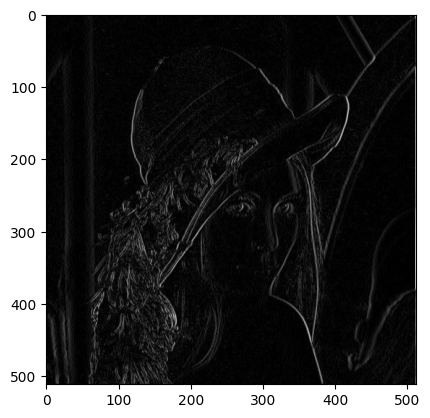

In [14]:
plt.imshow(output_image, cmap='gray')
plt.show()

In [15]:
# save the model
torch.save(model.state_dict(), 'sobel.pth') # weights only